### 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
Îç∞Ïù¥ÌÑ∞ Î°úÎìú, Ï†ÑÏ≤òÎ¶¨, Î™®Îç∏ Íµ¨ÏÑ±, ÌèâÍ∞Ä, ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ï£ºÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.


In [20]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras import backend as K
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from IPython.display import display

### 2. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∏∞Ï¥à ÌÉêÏÉâ
Reuters Îâ¥Ïä§ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Í≥† ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞, Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨, ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨Î•º Ï∂úÎ†• Î∞è ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.


**Í∞ÄÏÑ§ÏÑ§Ï†ï**

1. ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî Ï†ÑÏ≤¥ Îã®Ïñ¥ ÏàòÎ•º ÌååÏïÖÏùÑ ÌïòÍ≥†, ÎπÑÏú®Î°ú Ï†ÅÏ†àÌïú Vocab size Î•º Ï∞æÏïÑÎ≥∏Îã§. 
2. **30 60 90**
3. Í∞Å ÌÖåÏä§Ìä∏Î≥ÑÎ°ú ÏàòÏπòÍ∞í Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê ÎÑ£ÎäîÎã§.
4. 100, 1000, 10000 ( ÎÑàÎ¨¥ Ï†ÅÏùÑ Í≤ΩÏö∞ , Ï†ÅÎãπÌïúÍ≤ΩÏö∞, 1ÌöåÎì§Ïñ¥Í∞Ñ Í≤ÉÎì§Ïù¥ ÎßéÏù¥ Îì§Ïñ¥Í∞Ñ Í≤ΩÏö∞ )

ÎπàÎèÑÍ∞Ä 1Ìöå Ïù¥ÌïòÏù∏ ÌÜ†ÌÅ∞ Ïàò: 10308
Ï†ÑÏ≤¥ ÌÜ†ÌÅ∞ 1638886, ÏÉÅÏúÑ 5000Í∞ú ÌÜ†ÌÅ∞ 1530903
ÏÉÅÏúÑ 5000Í∞ú ÌÜ†ÌÅ∞Ïù¥ Ï†ÑÏ≤¥ÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ë: 93.41%
Top 100 tokens coverage: 48.23%
Top 500 tokens coverage: 69.18%
Top 1000 tokens coverage: 78.31%
Top 2000 tokens coverage: 85.96%
Top 5000 tokens coverage: 93.41%
Top 10000 tokens coverage: 97.26%
Top 20000 tokens coverage: 99.29%
Top 30000 tokens coverage: 99.94%

100, 1000, 10000

ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: 8982
ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: 2246
ÌÅ¥ÎûòÏä§ Ïàò: 46
ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÏµúÎåÄ Í∏∏Ïù¥: 2376
ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÌèâÍ∑† Í∏∏Ïù¥: 145.5398574927633


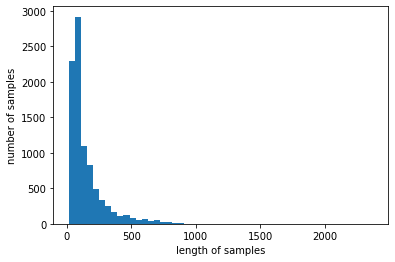

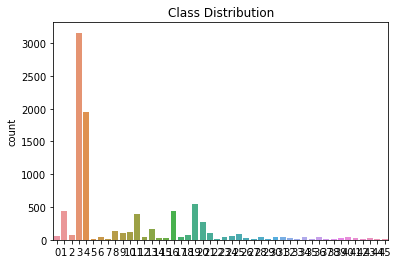

Í∞Å ÌÅ¥ÎûòÏä§ ÎπàÎèÑÏàò:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [2]:
# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÌÉêÏÉâ
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

print('ÌõàÎ†® ÏÉòÌîåÏùò Ïàò:', len(x_train))
print('ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò:', len(x_test))
print('ÌÅ¥ÎûòÏä§ Ïàò:', max(y_train) + 1)
print('ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÏµúÎåÄ Í∏∏Ïù¥:', max(len(l) for l in x_train))
print('ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÌèâÍ∑† Í∏∏Ïù¥:', sum(map(len, x_train))/len(x_train))

plt.hist([len(x) for x in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.show()

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Í∞Å ÌÅ¥ÎûòÏä§ ÎπàÎèÑÏàò:")
print(np.asarray((unique_elements, counts_elements)))

# Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂àÍ∑†ÌòïÌï®ÏùÑ Î∞úÍ≤¨Ìï®.

Îî∞Î°ú Ï†ÑÏ≤òÎ¶¨ ÏßÑÌñâÌïòÏßÄ ÏïäÍ≥† Ïã§ÌñâÌñàÏùå
Î™®ÎëêÎã§ Ï†ÑÏ≤òÎ¶¨ ÏïàÌï®


### 3. Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î≥µÏõê Ìï®Ïàò Ï†ïÏùò
Ï†ïÏàò Ïù∏Îç±Ïä§Î•º Îã®Ïñ¥Î°ú Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌïú `get_index_to_word()`ÏôÄ ÏãúÌÄÄÏä§Î•º Î¨∏Ïû•ÏúºÎ°ú Î≥µÏõêÌïòÎäî `decode_to_text()` Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.


In [3]:
# Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î≥µÏõê
def get_index_to_word():
    word_index = reuters.get_word_index(path="reuters_word_index.json")
    index_to_word = {index + 3: word for word, index in word_index.items()}
    index_to_word[0] = '<pad>'
    index_to_word[1] = '<sos>'
    index_to_word[2] = '<unk>'
    return index_to_word

index_to_word = get_index_to_word()

def decode_to_text(data):
    return [' '.join([index_to_word.get(idx, '<unk>') for idx in seq]) for seq in data]

### 4. vocab_size Î≥Ñ Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
Îã®Ïñ¥ Ïàò Ï†úÌïú(`vocab_size = 100, 1000, 10000`)Ïóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Í≥†,
TF-IDF Î≤°ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÏó¨ Î™®Îç∏Ïóê ÏûÖÎ†•Ìï† Ïàò ÏûàÎèÑÎ°ù Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.


In [8]:
# Ïó¨Îü¨ vocab_size Ïã§Ìóò
data_by_vocab = {}
vocab_sizes = [100, 1000, 10000]

for size in vocab_sizes:
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=size, test_split=0.2)
    decoded_train = decode_to_text(x_train)
    decoded_test = decode_to_text(x_test)

    dtmvector = CountVectorizer()
    tfidf_transformer = TfidfTransformer()

    dtm_train = dtmvector.fit_transform(decoded_train)
    dtm_test = dtmvector.transform(decoded_test)

    tfidfv_train = tfidf_transformer.fit_transform(dtm_train)
    tfidfv_test = tfidf_transformer.transform(dtm_test)

    data_by_vocab[size] = {
        'x_train': x_train,
        'y_train': y_train,
        'x_test': x_test,
        'y_test': y_test,
        'tfidfv_train': tfidfv_train,
        'tfidfv_test': tfidfv_test
    }


### 5. Î®∏Ïã†Îü¨Îãù Î™®Îç∏ Ï†ïÏùò
ÎπÑÍµê ÎåÄÏÉÅÏúºÎ°ú ÏÇ¨Ïö© ML Î™®Îç∏ 3Ï¢Ö (ÏùòÏÇ¨Í≤∞Ï†ïÌä∏Î¶¨, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, Í∑∏ÎûòÎîîÏñ∏Ìä∏Î∂ÄÏä§ÌåÖ)ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.

Í∞Å Î™®Îç∏Ïóê ÎåÄÌï¥ vocab_size Î≥ÑÎ°ú ÌïôÏäµÌïòÍ≥†, Ï†ïÌôïÎèÑ, F1-score, ÏÜåÏöî ÏãúÍ∞ÑÏùÑ Ï∏°Ï†ïÌï©ÎãàÎã§.

In [9]:
# Î™®Îç∏ Ï†ïÏùò Î∞è Ïã§Ìñâ
selected_models = [
    DecisionTreeClassifier(max_depth=10, random_state=0),
    RandomForestClassifier(n_estimators=5, random_state=0),
    GradientBoostingClassifier(random_state=0)
]


In [10]:
test_results = []

def run_models(models, data_by_vocab):
    for model in models:
        model_name = model.__class__.__name__
        for vocab_size, data in data_by_vocab.items():
            print(f"== Model: {model_name}, Vocab Size: {vocab_size}")

            tfidfv_train = data['tfidfv_train']
            tfidfv_test = data['tfidfv_test']
            y_train = data['y_train']
            y_test = data['y_test']

            start_time = time.time()
            model.fit(tfidfv_train, y_train)
            predicted = model.predict(tfidfv_test)
            elapsed_time = time.time() - start_time

            acc = accuracy_score(y_test, predicted)
            cr = classification_report(y_test, predicted, zero_division=0, output_dict=True)
            f1 = cr['weighted avg']['f1-score']

            print(f"   Ï†ïÌôïÎèÑ: {round(acc, 5)}")
            print(f"   F1-Score: {round(f1, 5)}")
            print(f"   ÏÜåÏöî ÏãúÍ∞Ñ: {round(elapsed_time, 2)}Ï¥à")

            test_results.append({
                'model': model_name,
                'vocab_size': vocab_size,
                'val_accuracy': round(acc, 4),
                'f1_score': round(f1, 4),
                'elapsed_time': round(elapsed_time, 2)
            })

run_models(selected_models, data_by_vocab)

== Model: DecisionTreeClassifier, Vocab Size: 100
   Ï†ïÌôïÎèÑ: 0.61576
   F1-Score: 0.58529
   ÏÜåÏöî ÏãúÍ∞Ñ: 0.52Ï¥à
== Model: DecisionTreeClassifier, Vocab Size: 1000
   Ï†ïÌôïÎèÑ: 0.61799
   F1-Score: 0.54526
   ÏÜåÏöî ÏãúÍ∞Ñ: 1.12Ï¥à
== Model: DecisionTreeClassifier, Vocab Size: 10000
   Ï†ïÌôïÎèÑ: 0.62021
   F1-Score: 0.57764
   ÏÜåÏöî ÏãúÍ∞Ñ: 1.55Ï¥à
== Model: RandomForestClassifier, Vocab Size: 100
   Ï†ïÌôïÎèÑ: 0.63802
   F1-Score: 0.61571
   ÏÜåÏöî ÏãúÍ∞Ñ: 0.68Ï¥à
== Model: RandomForestClassifier, Vocab Size: 1000
   Ï†ïÌôïÎèÑ: 0.70748
   F1-Score: 0.68285
   ÏÜåÏöî ÏãúÍ∞Ñ: 0.96Ï¥à
== Model: RandomForestClassifier, Vocab Size: 10000
   Ï†ïÌôïÎèÑ: 0.67409
   F1-Score: 0.64295
   ÏÜåÏöî ÏãúÍ∞Ñ: 1.64Ï¥à
== Model: GradientBoostingClassifier, Vocab Size: 100
   Ï†ïÌôïÎèÑ: 0.63936
   F1-Score: 0.63604
   ÏÜåÏöî ÏãúÍ∞Ñ: 381.94Ï¥à
== Model: GradientBoostingClassifier, Vocab Size: 1000
   Ï†ïÌôïÎèÑ: 0.74533
   F1-Score: 0.73848
   ÏÜåÏöî ÏãúÍ∞Ñ: 762.56Ï¥à
== Model: GradientBoostingCla

### 7. ML Í≤∞Í≥º ÌÖåÏù¥Î∏î ÏÉùÏÑ±
Ï∏°Ï†ïÎêú Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïòÍ≥†, vocab_size Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ ÎπÑÍµêÍ∞Ä ÏâΩÎèÑÎ°ù Íµ¨ÏÑ±Ìï©ÎãàÎã§.


In [11]:
# Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†•
result_df = pd.DataFrame(test_results)
result_df['vocab_size_for_plot'] = result_df['vocab_size'].apply(lambda x: 20000 if pd.isna(x) else int(x))
result_df_sorted = result_df.sort_values(by=['model', 'vocab_size_for_plot'])
display(result_df_sorted[['model', 'vocab_size', 'val_accuracy', 'f1_score', 'elapsed_time']])

model  vocab_size  val_accuracy  f1_score  \
0      DecisionTreeClassifier         100        0.6158    0.5853   
1      DecisionTreeClassifier        1000        0.6180    0.5453   
2      DecisionTreeClassifier       10000        0.6202    0.5776   
6  GradientBoostingClassifier         100        0.6394    0.6360   
7  GradientBoostingClassifier        1000        0.7453    0.7385   
8  GradientBoostingClassifier       10000        0.7663    0.7622   
3      RandomForestClassifier         100        0.6380    0.6157   
4      RandomForestClassifier        1000        0.7075    0.6828   
5      RandomForestClassifier       10000        0.6741    0.6429   

   elapsed_time  
0          0.52  
1          1.12  
2          1.55  
6        381.94  
7        762.56  
8        980.53  
3          0.68  
4          0.96  
5          1.64

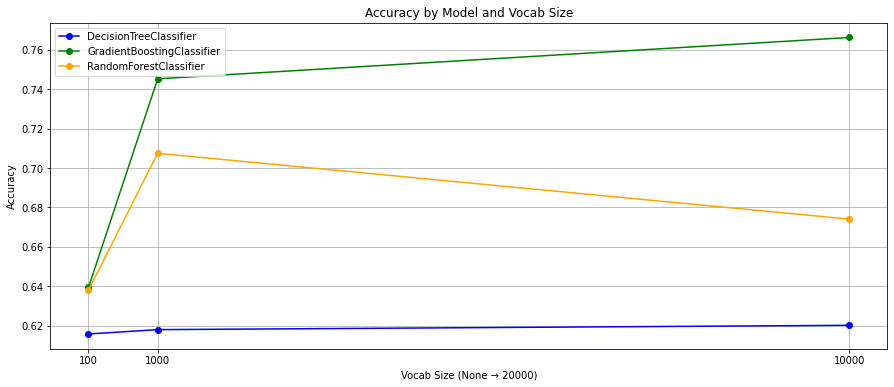

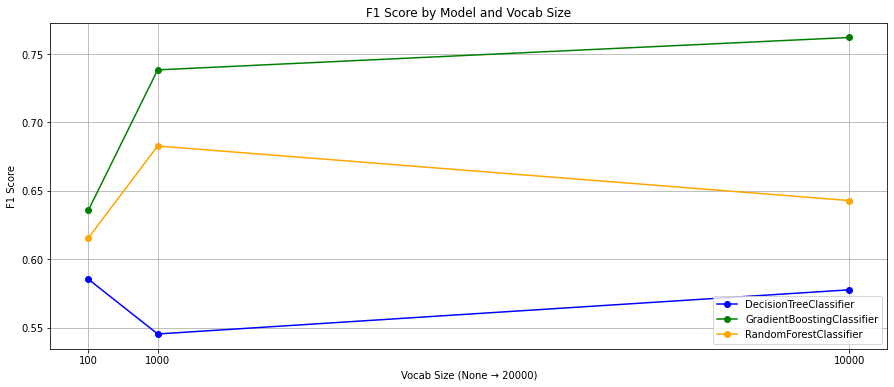

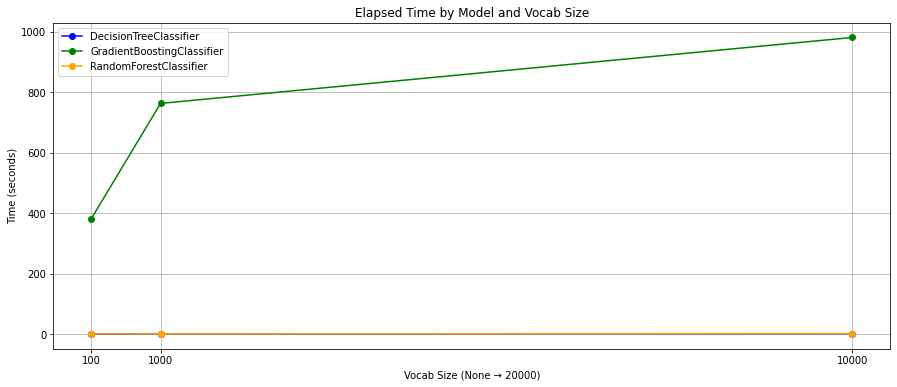

In [12]:
# Í∑∏ÎûòÌîÑ Ï∂úÎ†• - Accuracy, F1 Score, Time
metrics = ['val_accuracy', 'f1_score', 'elapsed_time']
titles = ['Accuracy by Model and Vocab Size', 'F1 Score by Model and Vocab Size', 'Elapsed Time by Model and Vocab Size']
ylabels = ['Accuracy', 'F1 Score', 'Time (seconds)']
colors = ['blue', 'green', 'orange']

for idx, metric in enumerate(metrics):
    plt.figure(figsize=(15, 6))
    for i, model_name in enumerate(result_df_sorted['model'].unique()):
        model_df = result_df_sorted[result_df_sorted['model'] == model_name]
        plt.plot(model_df['vocab_size_for_plot'], model_df[metric], marker='o', color=colors[i], label=model_name)
    plt.title(titles[idx])
    plt.xlabel('Vocab Size (None ‚Üí 20000)')
    plt.ylabel(ylabels[idx])
    plt.xticks(sorted(result_df_sorted['vocab_size_for_plot'].unique()))
    plt.legend()
    plt.grid(True)
    plt.show()


# ML ÎπÑÍµê Ïù∏ÏÇ¨Ïù¥Ìä∏

Ï†ÑÏ≤¥ Ïã§Ìóò Íµ¨ÏÑ± ÏöîÏïΩ
Îç∞Ïù¥ÌÑ∞ÏÖã: Reuters Îâ¥Ïä§ Îç∞Ïù¥ÌÑ∞ (46Í∞ú Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò)

ÏûÖÎ†• Î≤°ÌÑ∞Ìôî: TF-IDF Í∏∞Î∞ò, vocab_size = [100, 1000, 10000]

Î™®Îç∏ ÌõÑÎ≥¥:

Îã®Ïùº Ìä∏Î¶¨: DecisionTreeClassifier

ÏïôÏÉÅÎ∏î: RandomForestClassifier, GradientBoostingClassifier

ÏÑ±Îä• ÏßÄÌëú: Accuracy, F1-score, Elapsed Time (ÌïôÏäµ+ÏòàÏ∏° ÏÜåÏöî ÏãúÍ∞Ñ)

---

### ÏÑ±Îä• Í∏∞Î∞ò Ï¢ÖÌï© Î∂ÑÏÑù

Î™®Îç∏Î≥ÑÎ°ú Accuracy, F1 Score, Time Ï∏°Î©¥ÏóêÏÑú Ïñ¥Îñ§ Î∞òÏùëÏùÑ Î≥¥ÏòÄÎäîÏßÄ Ï†ïÎ¶¨Ìï©ÎãàÎã§. Í∞Å ÏßÄÌëúÏóê ÎåÄÌï¥ vocab size Ï¶ùÍ∞ÄÍ∞Ä Î™®Îç∏ ÏÑ±Îä•Í≥º Ìö®Ïú®ÏÑ±Ïóê Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ Ï£ºÎäîÏßÄ Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú ÏÑ§Î™ÖÌï©ÎãàÎã§.

---

### Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê ÏöîÏïΩ

| Î™®Îç∏                   | Accuracy (Ï†ïÌôïÎèÑ)           | F1 Score (Í∑†Ìòï ÏÑ±Îä•)        | Ïã§Ìñâ ÏãúÍ∞Ñ (ÌïôÏäµ ÏÜçÎèÑ)     | Ìï¥ÏÑù ÏöîÏïΩ                          |
|------------------------|------------------------------|-------------------------------|-----------------------------|------------------------------------|
| Random Forest          | Îã®Ïñ¥ Ïàò ÎäòÎ¶¥ÏàòÎ°ù Í≥ÑÏÜç Ìñ•ÏÉÅ   | F1ÎèÑ Ìï®Íªò Í≥ÑÏÜç Ìñ•ÏÉÅ           | Îß§Ïö∞ Îπ†Î¶Ñ (0Ï¥àÎ°ú ÌëúÍ∏∞Îê®)   | ÏÑ±Îä• Ï¢ãÍ≥† ÏïàÏ†ïÏ†Å. Ïã§Î¨¥ Ï†ÅÏö©Ïóê Ï†ÅÌï© |
| Gradient Boosting      | 1000ÏóêÏÑú ÏµúÍ≥†, Ïù¥ÌõÑ ÌïòÎùΩ     | 1000ÏóêÏÑú ÏµúÍ≥†, Ïù¥ÌõÑ ÌïòÎùΩ      | Í∞ÄÏû• ÎäêÎ¶º                   | ÏÑ±Îä• Ï¢ãÏßÄÎßå ÏòàÎØºÌïòÍ≥† ÎäêÎ¶º          |
| Decision Tree          | Í±∞Ïùò Î≥ÄÌôî ÏóÜÏùå               | ÎÇÆÍ≥† Î∂àÏïàÏ†ïÌï®                 | Îß§Ïö∞ Îπ†Î¶Ñ                   | Îã®ÏàúÌïòÍ≥† Îπ†Î•¥ÏßÄÎßå ÏÑ±Îä• ÌïúÍ≥Ñ ÏûàÏùå   |

---

### Ìï¥ÏÑù ÏöîÏïΩ (by GPT)

#### Random Forest
- **Ïôú ÏÑ±Îä•Ïù¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú Ìñ•ÏÉÅÎê†Íπå?**  
  Random ForestÎäî Ïó¨Îü¨ Í∞úÏùò Í≤∞Ï†ï Ìä∏Î¶¨Î•º ÎûúÎç§ÌïòÍ≤å Íµ¨ÏÑ±ÌïòÍ≥† ÌèâÍ∑†ÏùÑ ÎÇ¥Îäî Íµ¨Ï°∞ÏûÖÎãàÎã§.  
  Îã®Ïñ¥ ÏàòÍ∞Ä ÎßéÏïÑÏßàÏàòÎ°ù Îçî Îã§ÏñëÌïú Î∂ÑÌï† Í∏∞Ï§Ä(ÌäπÏÑ± Ï°∞Ìï©)ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≤å ÎêòÎ©∞,  
  Í∑∏ÎßåÌÅº ÏòàÏ∏° Ï†ïÌôïÎèÑÎèÑ ÏûêÏó∞Ïä§ÎüΩÍ≤å Ìñ•ÏÉÅÎê©ÎãàÎã§.  
  ÎòêÌïú Îã§ÏàòÏùò Ìä∏Î¶¨Î•º ÌèâÍ∑† ÎÇ¥Í∏∞ ÎïåÎ¨∏Ïóê Í≥ºÏ†ÅÌï©Ïóê Í∞ïÌïòÍ≥†, ÏÜåÏàò ÌÅ¥ÎûòÏä§ÏóêÎèÑ Ïñ¥Îäê Ï†ïÎèÑ ÎåÄÏùëÎ†•Ïù¥ ÏûàÏäµÎãàÎã§.
  

- **Ïôú Îπ†Î•ºÍπå?**  
  Î≥ëÎ†¨ ÌïôÏäµÏù¥ Í∞ÄÎä•ÌïòÍ≥†, Í∞Å Ìä∏Î¶¨Í∞Ä ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú ÏûëÎèôÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏÜçÎèÑ Ï†ÄÌïòÍ∞Ä ÌÅ¨ÏßÄ ÏïäÏäµÎãàÎã§.  
  ÌäπÌûà sklearn Í∏∞Î≥∏ Íµ¨ÌòÑÏùÄ ÎÇ¥Î∂Ä ÏµúÏ†ÅÌôîÍ∞Ä Ïûò ÎêòÏñ¥ ÏûàÏñ¥ ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Ïã§Ìñâ ÏãúÍ∞ÑÏù¥ Í±∞Ïùò Î¨¥ÏãúÎê† Ï†ïÎèÑÏûÖÎãàÎã§.

---

#### Gradient Boosting
- **Ïôú 1000ÏóêÏÑú ÏÑ±Îä•Ïù¥ ÏµúÍ≥†ÏòÄÏùÑÍπå?**  
  BoostingÏùÄ Ïù¥Ï†Ñ Î™®Îç∏Ïù¥ ÌãÄÎ¶∞ Î∂ÄÎ∂ÑÏùÑ Í≥ÑÏÜç Î≥¥ÏôÑÌï¥ÎÇòÍ∞ÄÎäî Î∞©ÏãùÏûÖÎãàÎã§.  
  Îã®Ïñ¥ ÏàòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ Ï†ïÎ≥¥Í∞Ä Î∂ÄÏ°±ÌïòÍ≥†, ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ Ï§ëÏöîÌïòÏßÄ ÏïäÏùÄ Îã®Ïñ¥ÍπåÏßÄ ÌïôÏäµÌï¥  
  Ïò§ÌûàÎ†§ Í≥ºÏ†ÅÌï©(overfitting)Ïù¥ Î∞úÏÉùÌïòÍ∏∞ ÏâΩÏäµÎãàÎã§.  
  vocab_size = 1000Ïùº ÎïåÎäî Î™®Îç∏Ïù¥ ÌïôÏäµÌï† Ïàò ÏûàÎäî ÌïµÏã¨ featureÎßå Ï†ÅÏ†àÌûà Ìè¨Ìï®ÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïóê  
  Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•Ïù¥ ÎÇòÏò® Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.


- **Ïôú ÎäêÎ¶¥Íπå?**  
  Gradient BoostingÏùÄ Ìä∏Î¶¨Î•º ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÌïòÎÇòÏî© ÏåìÏïÑ Ïò¨Î¶¨Î©∞ Ïò§Ï∞®Î•º Ï§ÑÏù¥Îäî Î∞©ÏãùÏù¥Îùº  
  Î∞òÎ≥µ ÌöüÏàòÍ∞Ä ÎßéÍ≥† Í≥ÑÏÇ∞ÎüâÏù¥ ÌÅΩÎãàÎã§. ÌäπÌûà Í≥†Ï∞®Ïõê featureÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏãúÍ∞ÑÏù¥ Îçî Ïò§Îûò Í±∏Î¶ΩÎãàÎã§.

---

#### Decision Tree
- **Ïôú ÏÑ±Îä•Ïù¥ Í±∞Ïùò Ïïà ÎäòÏñ¥ÎÇ¨ÏùÑÍπå?**  
  Îã®Ïùº Ìä∏Î¶¨Îäî Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ Ìè¨Ï∞©ÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ Íµ¨Ï°∞ÏûÖÎãàÎã§.  
  featureÍ∞Ä ÎßéÏïÑÏ†∏ÎèÑ Ìä∏Î¶¨Ïùò ÍπäÏù¥(depth)Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÍ±∞ÎÇò Í∞ÄÏßÄÏπòÍ∏∞(pruning)Í∞Ä ÏùºÏñ¥ÎÇòÎ©¥  
  Ï†ïÎ≥¥Í∞Ä ÏûòÎ†§ÎÇòÍ∞ÄÎ©¥ÏÑú ÏÑ±Îä•Ïù¥ Ï†ïÏ≤¥Îê©ÎãàÎã§.  
  ÎòêÌïú Îã®Ïñ¥Ïùò ÏàúÏÑúÎÇò ÏùòÎØ∏ Í¥ÄÍ≥ÑÎ•º Î∞òÏòÅÌïòÏßÄ Î™ªÌï¥ Ï†ïÎ≥¥ ÌôúÏö©Ïóê ÌïúÍ≥ÑÍ∞Ä ÏûàÏäµÎãàÎã§.
  

- **Ïôú Îπ†Î•ºÍπå?**  
  ÌïôÏäµ Î∞©ÏãùÏù¥ Îã®ÏàúÌï¥ÏÑú Í≥ÑÏÇ∞Ïù¥ Îπ†Î•¥Í≥†, Ìïú Î≤àÏùò top-down Î∂ÑÌï†Îßå ÏàòÌñâÌïòÎ©¥ ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê  
  Ïã§Ìñâ ÏãúÍ∞ÑÏù¥ Îß§Ïö∞ ÏßßÏäµÎãàÎã§. Îã§Îßå, Í∑∏ÎßåÌÅº ÏÑ±Îä•ÏùÄ Ï†úÌïúÏ†ÅÏûÖÎãàÎã§.

### 8. LSTM Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
LSTM Î™®Îç∏Ïùò Ïã§Ìóò Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏(`lstm_results`)Î•º Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.

Embedding ‚Üí LSTM ‚Üí Dense Íµ¨Ï°∞Ïùò Î™®Îç∏ÏùÑ Ï†ïÏùòÌïòÍ≥†, Í∞Å vocab_sizeÏóê ÎåÄÌï¥ ÌïôÏäµÍ≥º ÌèâÍ∞ÄÎ•º ÏàòÌñâÌïòÎäî Ìï®ÏàòÎ•º ÏûëÏÑ±Ìï©ÎãàÎã§.


In [28]:
# LSTM Î™®Îç∏ Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
lstm_results = []

# vocab_sizeÏóê Îî∞Îùº LSTM Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥† ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def run_lstm_by_vocab(data_by_vocab):
    # Í∞Å vocab_sizeÏóê ÎåÄÌï¥ Î∞òÎ≥µ
    for vocab_size, data in data_by_vocab.items():
        print(f"== LSTM Model, Vocab Size: {vocab_size}")

        # ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú (Ï†ïÏàò Ïù∏Îç±Ïä§Î°ú Íµ¨ÏÑ±Îêú ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞)
        x_train = data['x_train']
        x_test = data['x_test']
        y_train = data['y_train']
        y_test = data['y_test']

        # Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ Í∞úÏàò Í≥ÑÏÇ∞ (0Î∂ÄÌÑ∞ ÏãúÏûëÌïòÎØÄÎ°ú +1)
        num_classes = np.max(y_train) + 1

        # LSTM ÏûÖÎ†• Í∏∏Ïù¥Î•º ÌÜµÏùº (200 Îã®Ïñ¥ÍπåÏßÄÎ°ú Ï†úÌïú)
        max_len = 200
        x_train = pad_sequences(x_train, maxlen=max_len)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ìå®Îî©
        x_test = pad_sequences(x_test, maxlen=max_len)    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ìå®Îî©

        # Ïù¥Ï†Ñ ÏÑ∏ÏÖò Ï¥àÍ∏∞Ìôî (Î©îÎ™®Î¶¨ ÎàÑÏàò Î∞©ÏßÄ)
        K.clear_session()

        # LSTM Í∏∞Î∞ò Î∂ÑÎ•ò Î™®Îç∏ Íµ¨ÏÑ±
        model = Sequential()  # ÏàúÏ∞®Ï†Å Î™®Îç∏ Íµ¨ÏÑ± ÏãúÏûë
        model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))  # Îã®Ïñ¥ Ïù∏Îç±Ïä§Î•º 128Ï∞®Ïõê ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
        model.add(LSTM(128))  # LSTM Î†àÏù¥Ïñ¥: Î¨∏Ïû•ÏùÑ 128Ï∞®Ïõê ÏãúÌÄÄÏä§ Î≤°ÌÑ∞Î°ú ÏöîÏïΩ
        model.add(Dense(num_classes, activation='softmax'))  # Ï∂úÎ†•Ï∏µ: ÌÅ¥ÎûòÏä§ ÏàòÎßåÌÅº softmaxÎ°ú ÌôïÎ•† Î∂ÑÌè¨ Ï∂úÎ†•

        # Î™®Îç∏ Ïª¥ÌååÏùº (loss: Îã§Ï§ë Î∂ÑÎ•òÏö©, optimizer: adam, metric: accuracy)
        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        # ÌïôÏäµ ÏãúÏûë ÏãúÍ∞Ñ Í∏∞Î°ù
        start_time = time.time()

        # Î™®Îç∏ ÌïôÏäµ ÏàòÌñâ (20 epoch, ÎØ∏ÎãàÎ∞∞Ïπò 64Í∞ú, 20%Îäî Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÏÇ¨Ïö©)
        model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=0, validation_split=0.2)

        # ÌïôÏäµ ÏôÑÎ£å ÏãúÍ∞Ñ Í∏∞Î°ù
        elapsed_time = time.time() - start_time

        # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° ÏàòÌñâ (ÌôïÎ•† Í∞í Î∞òÌôò)
        y_pred_probs = model.predict(x_test, verbose=0)

        # ÌôïÎ•† Í∞í Ï§ë Í∞ÄÏû• ÎÜíÏùÄ ÌÅ¥ÎûòÏä§ Ïù∏Îç±Ïä§Î•º ÏµúÏ¢Ö ÏòàÏ∏° Í≤∞Í≥ºÎ°ú ÏÇ¨Ïö©
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ (Ï†ïÎãµÍ≥º ÏòàÏ∏°Ïù¥ ÏñºÎßàÎÇò ÏùºÏπòÌïòÎäîÍ∞Ä)
        acc = accuracy_score(y_test, y_pred)

        # F1-score Í≥ÑÏÇ∞ (Î∂àÍ∑†Ìòï ÌÅ¥ÎûòÏä§ Í≥†Î†§Ìïú Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú® Ï°∞Ìôî ÌèâÍ∑†)
        cr = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
        f1 = cr['weighted avg']['f1-score']

        # ÏÑ±Îä• Ï∂úÎ†•
        print(f"   Ï†ïÌôïÎèÑ: {round(acc, 5)}")
        print(f"   F1-Score: {round(f1, 5)}")
        print(f"   ÏÜåÏöî ÏãúÍ∞Ñ: {round(elapsed_time, 2)}Ï¥à")

        # Í≤∞Í≥ºÎ•º ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Ï†ÄÏû• (ÌõÑÏóê ÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôò Í∞ÄÎä•)
        lstm_results.append({
            'model': 'LSTM',                  # Î™®Îç∏Î™Ö
            'vocab_size': vocab_size,         # ÏÇ¨Ïö©Ìïú vocab ÌÅ¨Í∏∞
            'val_accuracy': round(acc, 4),    # Ï†ïÌôïÎèÑ
            'f1_score': round(f1, 4),         # F1-score
            'elapsed_time': round(elapsed_time, 2)  # ÌïôÏäµ Î∞è ÏòàÏ∏° ÏãúÍ∞Ñ
        })


### 9. ML + LSTM Í≤∞Í≥º Î≥ëÌï©
Îëê Î™®Îç∏ Í≥ÑÏó¥Ïùò Í≤∞Í≥ºÎ•º ÌïòÎÇòÎ°ú Ìï©Ï≥êÏÑú ÎπÑÍµê Í∞ÄÎä•Ìïú ÌòïÌÉúÎ°ú Ï†ïÎ¶¨Ìï©ÎãàÎã§.

ML Î™®Îç∏Í≥º LSTM Î™®Îç∏ÏùÑ Ìè¨Ìï®Ìïú Î™®Îì† Î™®Îç∏Ïóê ÎåÄÌï¥ Accuracy, F1 Score, Elapsed TimeÏùÑ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

== LSTM Model, Vocab Size: 100
   Ï†ïÌôïÎèÑ: 0.57302
   F1-Score: 0.5199
   ÏÜåÏöî ÏãúÍ∞Ñ: 25.46Ï¥à
== LSTM Model, Vocab Size: 1000
   Ï†ïÌôïÎèÑ: 0.72707
   F1-Score: 0.71002
   ÏÜåÏöî ÏãúÍ∞Ñ: 25.58Ï¥à
== LSTM Model, Vocab Size: 10000
   Ï†ïÌôïÎèÑ: 0.67008
   F1-Score: 0.66576
   ÏÜåÏöî ÏãúÍ∞Ñ: 26.07Ï¥à


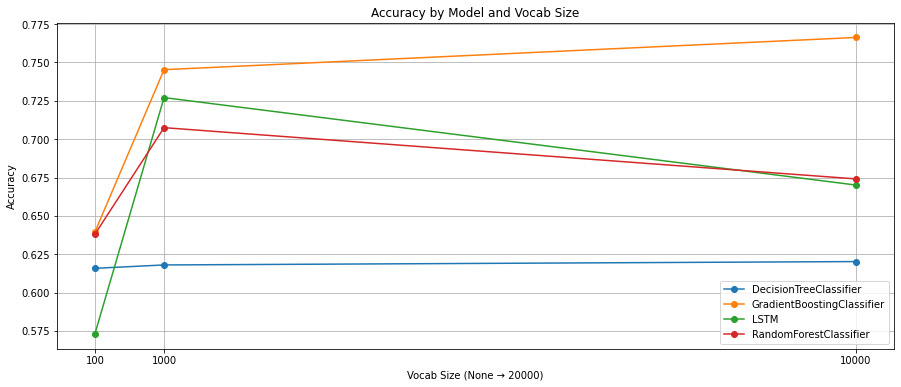

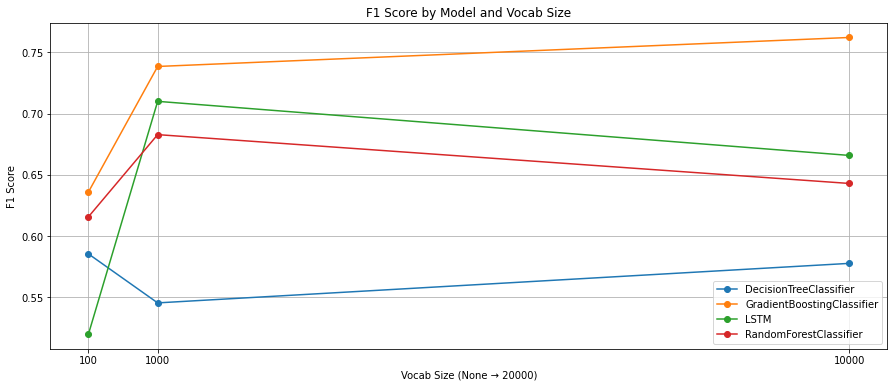

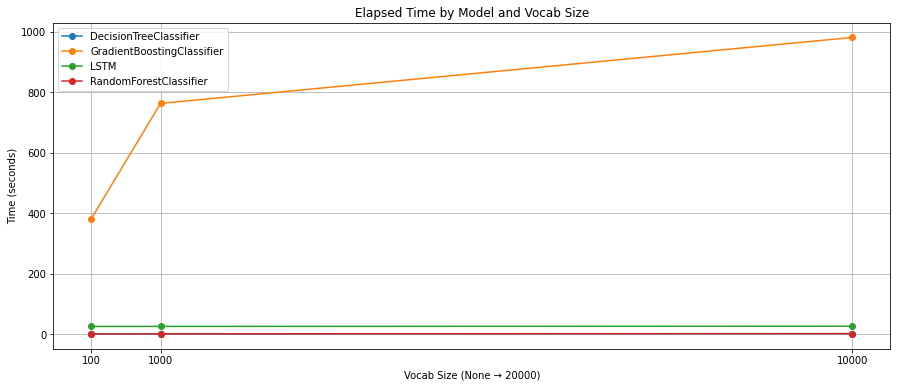

In [29]:
run_lstm_by_vocab(data_by_vocab)

# Í∏∞Ï°¥ Í≤∞Í≥ºÏôÄ Ìï©ÏπòÍ∏∞
total_result_df = pd.concat([
    result_df,
    pd.DataFrame(lstm_results)
], ignore_index=True)

# ÏãúÍ∞ÅÌôîÏö© vocab Ï†ïÎ¶¨
total_result_df['vocab_size_for_plot'] = total_result_df['vocab_size'].apply(lambda x: 20000 if pd.isna(x) else int(x))
total_result_df_sorted = total_result_df.sort_values(by=['model', 'vocab_size_for_plot'])

# ÏãúÍ∞ÅÌôî
for idx, metric in enumerate(metrics):
    plt.figure(figsize=(15, 6))
    for i, model_name in enumerate(total_result_df_sorted['model'].unique()):
        model_df = total_result_df_sorted[total_result_df_sorted['model'] == model_name]
        plt.plot(model_df['vocab_size_for_plot'], model_df[metric], marker='o', label=model_name)
    plt.title(titles[idx])
    plt.xlabel('Vocab Size (None ‚Üí 20000)')
    plt.ylabel(ylabels[idx])
    plt.xticks(sorted(total_result_df_sorted['vocab_size_for_plot'].unique()))
    plt.legend()
    plt.grid(True)
    plt.show()


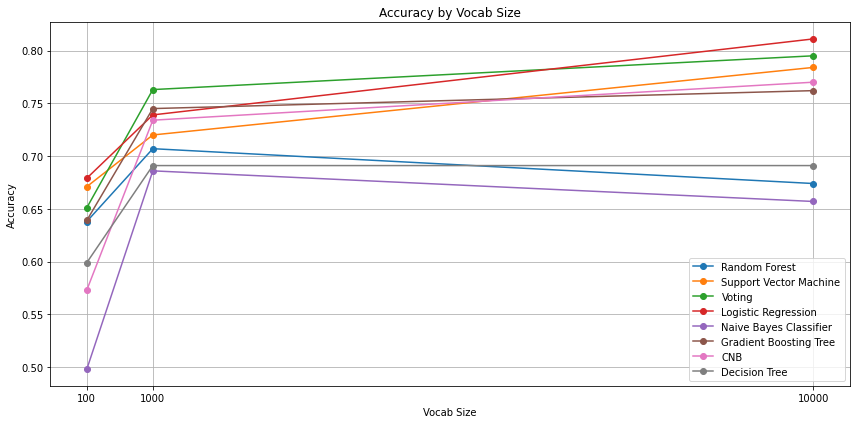

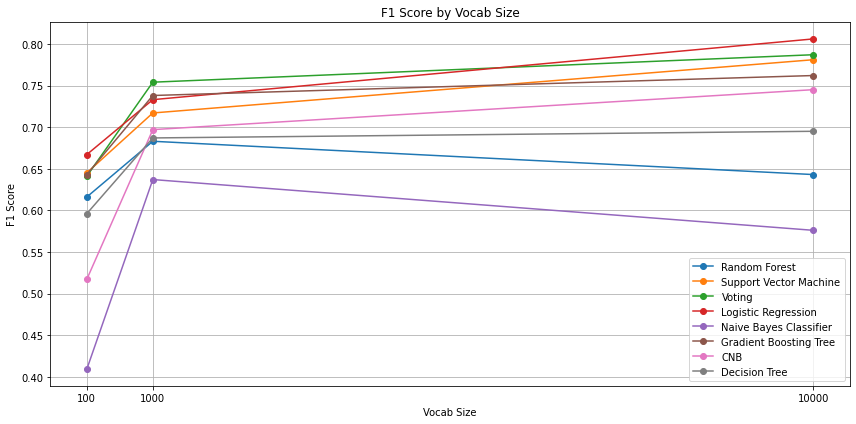

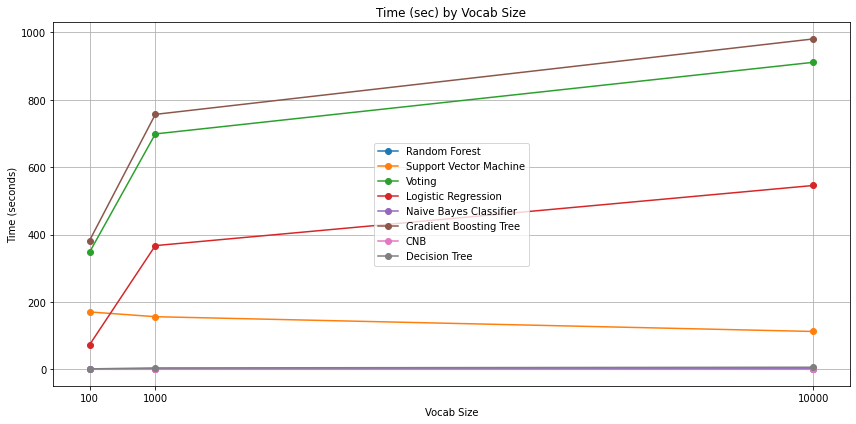

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ ÏàòÎèô ÏûÖÎ†•
data = {
    'model': [
        'Random Forest', 'Random Forest', 'Random Forest',
        'Support Vector Machine', 'Support Vector Machine', 'Support Vector Machine',
        'Voting', 'Voting', 'Voting',
        'Logistic Regression', 'Logistic Regression', 'Logistic Regression',
        'Naive Bayes Classifier', 'Naive Bayes Classifier', 'Naive Bayes Classifier',
        'Gradient Boosting Tree', 'Gradient Boosting Tree', 'Gradient Boosting Tree',
        'CNB', 'CNB', 'CNB',
        'Decision Tree', 'Decision Tree', 'Decision Tree'
    ],
    'vocab_size': [
        100, 1000, 10000,
        100, 1000, 10000,
        100, 1000, 10000,
        100, 1000, 10000,
        100, 1000, 10000,
        100, 1000, 10000,
        100, 1000, 10000,
        100, 1000, 10000
    ],
    'accuracy': [
        0.638, 0.707, 0.674,
        0.671, 0.720, 0.784,
        0.651, 0.763, 0.795,
        0.679, 0.739, 0.811,
        0.498, 0.686, 0.657,
        0.639, 0.745, 0.762,
        0.573, 0.734, 0.770,
        0.599, 0.691, 0.691
    ],
    'f1_score': [
        0.616, 0.683, 0.643,
        0.645, 0.717, 0.781,
        0.641, 0.754, 0.787,
        0.667, 0.733, 0.806,
        0.409, 0.637, 0.576,
        0.643, 0.738, 0.762,
        0.517, 0.697, 0.745,
        0.596, 0.687, 0.695
    ],
    'time_sec': [
        0.68, 0.96, 1.64,
        170.21, 156.07, 112.21,
        347.26, 698.55, 911.16,
        72.57, 367.07, 545.54,
        0.01, 0.02, 0.04,
        381.94, 756.56, 980.53,
        0.01, 0.02, 0.01,
        1.24, 4.11, 6.1
    ]
}

df = pd.DataFrame(data)

# ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

metrics = ['accuracy', 'f1_score', 'time_sec']
titles = ['Accuracy by Vocab Size', 'F1 Score by Vocab Size', 'Time (sec) by Vocab Size']
ylabels = ['Accuracy', 'F1 Score', 'Time (seconds)']

for idx, metric in enumerate(metrics):
    plt.figure(figsize=(12, 6))
    for model_name in df['model'].unique():
        subset = df[df['model'] == model_name]
        sorted_subset = subset.sort_values(by='vocab_size')
        plt.plot(sorted_subset['vocab_size'], sorted_subset[metric], marker='o', label=model_name)
    plt.title(titles[idx])
    plt.xlabel('Vocab Size')
    plt.ylabel(ylabels[idx])
    plt.xticks([100, 1000, 10000])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### üìä LSTM Î™®Îç∏ ÏÑ±Îä• Ïù∏ÏÇ¨Ïù¥Ìä∏ (vocab_size Î≥Ñ ÎπÑÍµê)

| Vocab Size | Accuracy | F1 Score | Time (sec) | Ìï¥ÏÑù ÏöîÏïΩ |
|------------|----------|----------|-------------|-----------|
| 100        | 0.573    | 0.5199   | 25.46Ï¥à     | Îã®Ïñ¥ ÏàòÍ∞Ä Ï†ÅÏñ¥ ÏùòÎØ∏ ÌëúÌòÑ Î∂ÄÏ°±. ÏÑ±Îä• Ï†úÌïúÏ†Å |
| 1000       | 0.727    | 0.7100   | 25.58Ï¥à     | Í∞ÄÏû• ÎÜíÏùÄ Ï†ïÌôïÎèÑÏôÄ F1. ÌïµÏã¨ Îã®Ïñ¥Îßå Ìè¨Ìï®Îèº Ìö®Í≥ºÏ†Å ÌïôÏäµ Í∞ÄÎä• |
| 10000      | 0.670    | 0.6658   | 26.07Ï¥à     | Î∂àÌïÑÏöîÌïú Îã®Ïñ¥ÍπåÏßÄ Ìè¨Ìï®ÎêòÏñ¥ ÏÑ±Îä• ÏÜåÌè≠ ÌïòÎùΩ. Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ± ÏûàÏùå |

#### üìå Ï£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏ Ï†ïÎ¶¨

- **vocab_size = 100**:  
  Îã®Ïñ¥ ÏàòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏñ¥ÏÑú Îâ¥Ïä§Ïùò Ï£ºÏöî Ï†ïÎ≥¥Í∞Ä ÎàÑÎùΩÎêòÍ≥†, Î™®Îç∏Ïù¥ Î∂ÑÎ•òÏóê ÌïÑÏöîÌïú ÏùòÎØ∏Î•º Ìè¨Ï∞©ÌïòÏßÄ Î™ªÌï®.  
  AccuracyÏôÄ F1 Score Î™®Îëê ÎÇÆÍ≤å ÎÇòÏò¥.

- **vocab_size = 1000**:  
  Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏ Íµ¨ÏÑ±. Ï†ÅÎãπÌïú ÏàòÏ§ÄÏùò ÌïµÏã¨ Îã®Ïñ¥Îì§ÏùÑ Ìè¨Ìï®Ìï¥ Ï†ïÎ≥¥Îäî Ï∂©Î∂ÑÌïòÍ≥†, Î∂àÌïÑÏöîÌïú Ïû°ÏùåÏùÄ Ï†ÅÏùå.  
  LSTMÏù¥ Ï§ëÏöîÌïú ÏùòÎØ∏ Îã®ÏúÑÎ•º Ïûò ÌïôÏäµÌï† Ïàò ÏûàÏóàÎçò Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.

- **vocab_size = 10000**:  
  Îã®Ïñ¥ ÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏïÑÏ†∏ÏÑú ÏÑ±Îä•Ïù¥ Ïò§ÌûàÎ†§ ÏÜåÌè≠ ÌïòÎùΩ.  
  ÎìúÎ¨ºÍ≤å Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Îì§Ïù¥ Ïò§ÌûàÎ†§ Î™®Îç∏ÏùÑ ÌòºÎûÄÏä§ÎüΩÍ≤å ÎßåÎì§ Ïàò ÏûàÏúºÎ©∞, Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ±ÎèÑ ÏûàÏùå.  
  ÏãúÍ∞ÑÏùÄ Í±∞Ïùò ÎèôÏùºÌïòÎØÄÎ°ú Ï†ïÎ≥¥Ïùò "Ïßà"Ïù¥ Ï§ëÏöîÌïòÎã§Îäî Ï†êÏùÑ Î≥¥Ïó¨Ï§å.

# ÏµúÏ¢Ö ÌöåÍ≥†

Ïù¥Î≤à Ïã§ÌóòÏóêÏÑúÎäî Î®∏Ïã†Îü¨Îãù Î™®Îç∏Îì§Í≥º LSTM Î™®Îç∏ÏùÑ ÎπÑÍµêÌïòÎ©∞, `vocab_size`Ïóê Îî∞Î•∏ ÏÑ±Îä• Î≥ÄÌôîÎ•º ÏÇ¥Ìé¥Î≥¥ÏïòÏäµÎãàÎã§.  
Í∑∏ Í≤∞Í≥º Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≤∞Î°†ÏùÑ ÎèÑÏ∂úÌï† Ïàò ÏûàÏóàÏäµÎãàÎã§:

1. **Random ForestÏôÄ Í∞ôÏùÄ Î™®Îç∏**ÏùÄ vocab sizeÍ∞Ä Ïª§ÏßàÏàòÎ°ù ÏÑ±Îä•Ïù¥ Íæ∏Ï§ÄÌûà Ìñ•ÏÉÅÎêòÎäî Î∞òÎ©¥,  
   **Gradient Boosting**ÏùÄ Ï†ÅÏ†àÌïú vocab sizeÏóêÏÑú ÏµúÍ≥†Ïùò ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.

2. **LSTM Î™®Îç∏ÏùÄ vocab_size=1000Ïùº Îïå Í∞ÄÏû• ÎÜíÏùÄ ÏÑ±Îä•**ÏùÑ Î≥¥Ïó¨Ï£ºÏóàÏäµÎãàÎã§.  
   Ïù¥Îäî Î™®Îç∏Ïù¥ "ÏñºÎßàÎÇò ÎßéÏùÄ Îã®Ïñ¥Î•º Î≥¥ÎäêÎÉê"Î≥¥Îã§ **ÏñºÎßàÎÇò ÌïµÏã¨ Îã®Ïñ¥Îßå Ïûò Î≥¥ÎäêÎÉê**Í∞Ä Îçî Ï§ëÏöîÌïòÎã§Îäî Ï†êÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.

3. ÌïôÏäµ ÏãúÍ∞Ñ Ï∏°Î©¥ÏóêÏÑúÎäî MLÍ≥º LSTM Î™®Îëê ÌÅ∞ Ï∞®Ïù¥Îäî ÏóÜÏóàÏúºÎÇò,  
   Gradient BoostingÏùÄ ÏãúÍ∞Ñ ÎåÄÎπÑ ÏÑ±Îä•Ïùò ÌïúÍ≥ÑÍ∞Ä ÏûàÏóàÍ≥†,  
   LSTMÏùÄ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÏôÄ ÏãúÌÄÄÏä§ Ï≤òÎ¶¨ÏóêÏÑú Îçî Ïú†Ïó∞ÌïòÍ≤å ÏûëÎèôÌïòÎäî Î™®ÏäµÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.

Ïù¥Î≤à Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Îã®ÏàúÌûà ÏÑ±Îä• ÏßÄÌëúÎßå ÎπÑÍµêÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº,  
**Î™®Îç∏ Íµ¨Ï°∞Ïóê ÎßûÎäî Îç∞Ïù¥ÌÑ∞ ÌëúÌòÑ Î∞©ÏãùÍ≥º ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ†ÌÉùÏù¥ Ï§ëÏöîÌïòÎã§Îäî Ï†ê**ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.  
Ìñ•ÌõÑÏóêÎäî Dropout, Bidirectional LSTM, ÎòêÎäî Attention Î©îÏª§ÎãàÏ¶òÏùÑ Ï∂îÍ∞ÄÌï¥ Îçî Î∞úÏ†ÑÎêú Î™®Îç∏ÏùÑ Ïã§ÌóòÌï¥Î≥º Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.